In [1]:
#Import Libraries

In [2]:
import tensorflow
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt 


In [3]:
#Import Training Data

In [4]:
fashionMist = keras.datasets.fashion_mnist
(trainImages,trainLabes),(testImages,testLabels) = fashionMist.load_data()
classNames = ['T-shirt/top','Trouser','Pullover','Dress','Coast','Sandal','Shirt','Sneaker','Bag','Ankle boot']
trainImages = trainImages / 255.0
testImages = testImages / 255.0
print("number of images to train: ",len(trainLabes))
print("number of images to test: ",len(testLabels))

number of images to train:  60000
number of images to test:  10000


In [5]:
#Example of an Image to train

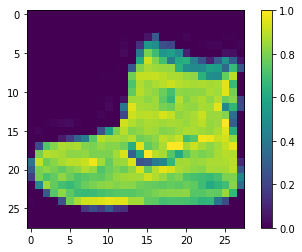

In [6]:
plt.figure()
plt.imshow(trainImages[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
# Set of Images with Correct Lables

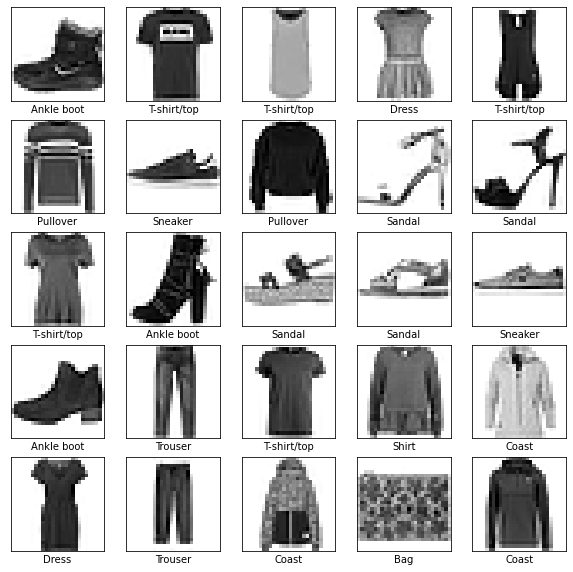

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i],cmap= plt.cm.binary)
    plt.xlabel(classNames[trainLabes[i]])
plt.show()

In [9]:
#Creating Layers for the Neural Network Model

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tensorflow.nn.relu),
    keras.layers.Dense(10,activation=tensorflow.nn.softmax)
    ])

In [11]:
#Traint the Model

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(trainImages,trainLabes,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4988 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3749 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3383 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3114 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2941 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2791 - accuracy: 0.8961
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2565 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2465 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.235

In [13]:
#Predict the Class of the TestImages

In [14]:
predictions = model.predict(testImages)

In [15]:
#Some Display Functions

In [16]:
def plotImage(i,predictionsArray,trueLabel,img):
    predictionsArray,trueLabel,img = predictionsArray[i],trueLabel[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predictedLabel = numpy.argmax(predictionsArray)
    if predictedLabel == trueLabel:  
        color = "blue"
    else:
        color = "red"
    plt.xlabel("{} {:2.0f}% ({})".format(classNames[predictedLabel],100*numpy.max(predictionsArray),classNames[trueLabel]),color=color)

def plotValueArray(i,predictionsArray,trueLabel):
    predictionsArray,trueLabel= predictionsArray[i],trueLabel[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictionsArray,color="#777777")
    plt.ylim([0,1])
    predictedLabel = numpy.argmax(predictionsArray)
    thisplot[predictedLabel].set_color('red')
    thisplot[trueLabel].set_color('green')

In [17]:
#Examples of Tested Images

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plotImage(i,predictions,testLabels,testImages)
plt.subplot(1,2,2)
plotValueArray(i,predictions,testLabels)
plt.show()

NameError: name 'prediction' is not defined

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plotImage(i,predictions,testLabels,testImages)
plt.subplot(1,2,2)
plotValueArray(i,predictions,testLabels)
plt.show()

NameError: name 'prediction' is not defined

In [20]:
numRows =  5
numCols = 5
numImages = numCols * numRows
plt.figure(figsize=(2*2*numCols,2*numRows))
for i in range(numImages):
    plt.subplot(numRows,2*numCols,2*i+1)
    plotImage(i,predictions,testLabels,testImages)
    plt.subplot(numRows,2*numCols,2*i+2)
    plotValueArray(i,predictions,testLabels)
plt.show()

NameError: name 'prediction' is not defined